# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
##### Why patients miss their scheduled appointments?
We will investigate the medical appointments dataset 'no_show' which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not the patient attends the appointment.


### Data Dictionary
- PatientId: Identification of a patient
- AppointmentID: Identification of each appointment
- Gender: Male or Female 
- AppointmentDay: day of the appointment
- ScheduledDay: day someone registered the appointment
- Age: How old is the patient.
- Neighbourhood: Where the appointment takes place
- Scholarship: True or False. Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
- Hipertension: True or False
- Diabetes: True or False
- Alcoholism: True or False
- Handcap: True or False
- SMS_received: True or False 
- No-show: whether or not the patient attends the appointment (True or False)

## Questions 
 - Question 1: What is Age Affect on No Show?
 - Question 2: which Gender has a high frequency for no show?

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
# Data Wrangling

### General Properties

In [2]:
#First 5 rows
df = pd.read_csv("no_show.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing data 

In [4]:
df.duplicated().sum()

0

no duplicated data

In [5]:
#summary statistcs 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There is an age below zero

### Data Assessment  Notes :
 
- No Data is missing
- Drop PatientId and AppointmentID columns
- Change all columns names to lowercase
- Change No-show name to show
- Change No-show DataType to int
- Change Gender DataType to int and rename it to is_female
- Make age bins
- Change ScheduledDay and AppointmentDay to date DataType
- Drop ages below 0 
- Change handcap DataType to Binary int

## Cleaning 

In [6]:
# making a copy to clean
df_clean = df.copy()

In [7]:
#Droping the PatientId and AppointmentID columns
df_clean.drop(columns=['PatientId','AppointmentID'],inplace=True)
#changing the columns to lowercase 
df_clean.columns = [x.lower() for x in df_clean.columns]
#Changin no-show to show
df_clean.rename(columns={"no-show":"show"},inplace=True)

In [8]:
#make age bins
df_clean['age_group'] = pd.qcut(df_clean.age,5,labels = ["0 - 12", "13 - 29", "30 - 44", "45 - 58", "59 - 115"])

In [9]:
#test
df_clean.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show,age_group
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,59 - 115
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,45 - 58
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,59 - 115
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 - 12
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,45 - 58


In [10]:
#Rename gender to is_female
df_clean.rename(columns={"gender":"is_female"},inplace=True)
#Converting Gender Data type to int 
df_clean.replace({'is_female': {'F': 1, 'M': 0}},inplace=True)
#Converting ScheduledDay and AppointmentDay to date 
df_clean[["scheduledday","appointmentday"]] = df_clean[["scheduledday","appointmentday"]].astype('datetime64')
#converting handcap to binary int
df_clean.replace({'handcap': {2:1,3:1,4:1}},inplace=True)
#Converting show to int 
df_clean.replace({'show': {'No': 1, 'Yes': 0}},inplace=True)

In [11]:
#Test
df_clean.handcap.value_counts()

0    108286
1      2241
Name: handcap, dtype: int64

In [12]:
#test
df_clean.is_female.value_counts()

1    71840
0    38687
Name: is_female, dtype: int64

In [13]:
#test
df_clean.show.value_counts()

1    88208
0    22319
Name: show, dtype: int64

In [14]:
#Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   is_female       110527 non-null  int64         
 1   scheduledday    110527 non-null  datetime64[ns]
 2   appointmentday  110527 non-null  datetime64[ns]
 3   age             110527 non-null  int64         
 4   neighbourhood   110527 non-null  object        
 5   scholarship     110527 non-null  int64         
 6   hipertension    110527 non-null  int64         
 7   diabetes        110527 non-null  int64         
 8   alcoholism      110527 non-null  int64         
 9   handcap         110527 non-null  int64         
 10  sms_received    110527 non-null  int64         
 11  show            110527 non-null  int64         
 12  age_group       110527 non-null  category      
dtypes: category(1), datetime64[ns](2), int64(9), object(1)
memory usage: 10.2+ MB


### Age below zero 
- Drop ages below 0 

In [15]:
df_clean.query("age < 0")

,is_female,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show,age_group
99832,1,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1,0 - 12


In [16]:
#Droping the age 
df_clean.drop(99832,inplace=True)

In [17]:
#test
df_clean.query("age < 0")

,is_female,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show,age_group


<a id='eda'></a>
## Exploratory Data Analysis

In [18]:
#summary statistcs 
df_clean.describe()

,is_female,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,0.649974,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.798066
std,0.476980,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Remarks:
- 80% show and 20% no show
- 64.9% are females 
- the average age is 37
- only 9% of the dataset have scholarships
- 19% have hypertension
- 7% have diabetes 
- 3% have alcoholism 
- 2% are handicapped
- 32% have received an SMS

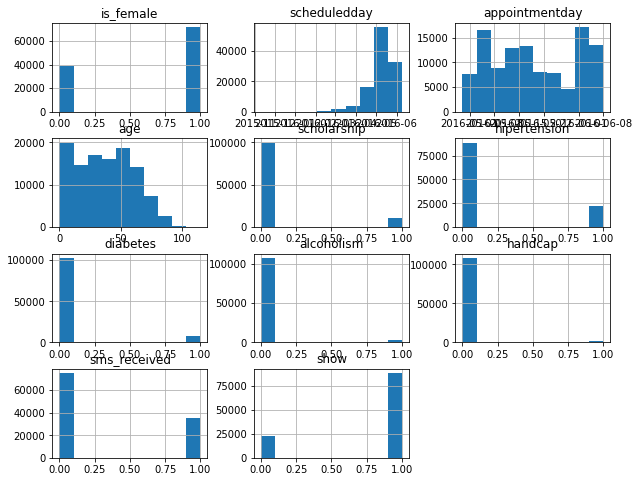

In [19]:
df_clean.hist(figsize=(10,8));

In [20]:
#corrlation between varibles 
df_clean.corr()

,is_female,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
is_female,1.000000,0.106452,0.114296,0.055722,0.032556,-0.106166,-0.022421,0.046302,-0.004122
age,0.106452,1.000000,-0.092463,0.504586,0.292391,0.095810,0.083742,0.012633,0.060327
scholarship,0.114296,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.009104,0.001192,-0.029134
hipertension,0.055722,0.504586,-0.019730,1.000000,0.433085,0.087970,0.084851,-0.006270,0.035704
diabetes,0.032556,0.292391,-0.024894,0.433085,1.000000,0.018473,0.059144,-0.014552,0.015181
alcoholism,-0.106166,0.095810,0.035022,0.087970,0.018473,1.000000,0.003692,-0.026149,0.000197
handcap,-0.022421,0.083742,-0.009104,0.084851,0.059144,0.003692,1.000000,-0.025221,0.007281
sms_received,0.046302,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.025221,1.000000,-0.126428
show,-0.004122,0.060327,-0.029134,0.035704,0.015181,0.000197,0.007281,-0.126428,1.000000


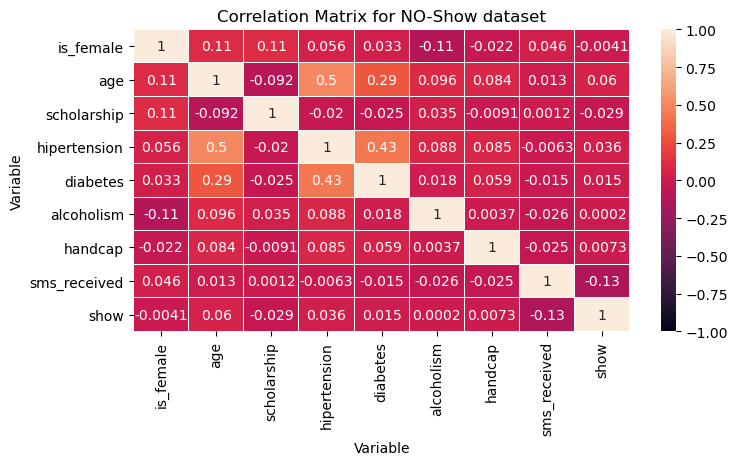

In [21]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.heatmap(df_clean.corr(), vmin = -1, vmax = 1, cmap = "rocket", linewidths=0.01, annot=True)
plt.title("Correlation Matrix for NO-Show dataset")
plt.xlabel("Variable")
plt.ylabel("Variable");

## Remarks:
There is no significant correlation between show and other values
#### Minor Positive correlations :
- hipertension and diabetes (0.43)
- age and diabetes (0.29)
- age and hypertension (0.5)

#### Minor Negative corrlations :
- scholarship and age (-0.092)
- SMS_received and show (-0.13)

## Which Gender has a high frequency for no show?

In [22]:
df_clean.is_female.value_counts()

1    71839
0    38687
Name: is_female, dtype: int64

/Users/fahadbakoor/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


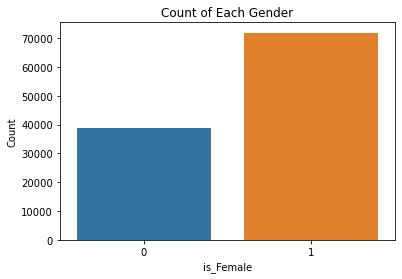

In [23]:
sns.countplot(df_clean.is_female);
plt.title("Count of Each Gender")
plt.xlabel("is_Female")
plt.ylabel("Count");

there is more females in the dataset then males 

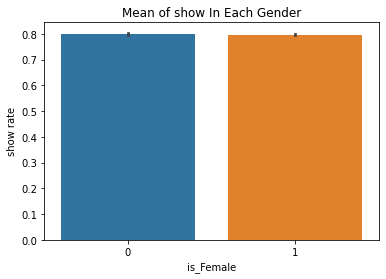

In [24]:
sns.barplot(x=df_clean.is_female,y=df_clean.show);
plt.title("Mean of show In Each Gender")
plt.xlabel("is_Female")
plt.ylabel("show rate");

In [25]:
df_clean.groupby('is_female').mean()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
is_female,,,,,,,,
0,33.736863,0.051904,0.167033,0.060408,0.055238,0.024582,0.291571,0.800321
1,38.894542,0.123234,0.213519,0.078036,0.017024,0.017957,0.336892,0.796851


### Remarks:
- 80% of females show up, and 79% of males 
- females are older than males on average 
- More males have Alcoholism than females 
- More females have Scholarship than males
- more males are handicapped than females 
- there doesn't seem to be a significant difference between Females and Males showing up

In [26]:
#reciving a sms affect a gender's show more 
df_clean.groupby(['is_female','sms_received']).show.mean()

is_female  sms_received
0          0               0.829934
           1               0.728369
1          0               0.834708
           1               0.722337
Name: show, dtype: float64

In [27]:
#age group affect on each gender's show 
df_clean.groupby(['is_female','age_group']).show.mean()

is_female  age_group
0          0 - 12       0.792904
           13 - 29      0.747800
           30 - 44      0.785725
           45 - 58      0.823386
           59 - 115     0.854487
1          0 - 12       0.790533
           13 - 29      0.750462
           30 - 44      0.786518
           45 - 58      0.819976
           59 - 115     0.843214
Name: show, dtype: float64

In [28]:
#scholarship affect on each gender's show 
df_clean.groupby(['is_female','scholarship']).show.mean()

is_female  scholarship
0          0              0.802257
           1              0.764940
1          0              0.801734
           1              0.762115
Name: show, dtype: float64

In [29]:
#hipertension affect on each gender's show 
df_clean.groupby(['is_female','hipertension']).show.mean()

is_female  hipertension
0          0               0.794880
           1               0.827453
1          0               0.788726
           1               0.826781
Name: show, dtype: float64

In [30]:
#diabetes affect on each gender's show 
df_clean.groupby(['is_female','diabetes']).show.mean()

is_female  diabetes
0          0           0.798845
           1           0.823278
1          0           0.795012
           1           0.818587
Name: show, dtype: float64

In [31]:
#alcoholism affect on each gender's show 
df_clean.groupby(['is_female','alcoholism']).show.mean()

is_female  alcoholism
0          0             0.798741
           1             0.827328
1          0             0.797695
           1             0.748160
Name: show, dtype: float64

In [32]:
#handcap affect on each gender's show 
df_clean.groupby(['is_female','handcap']).show.mean()

is_female  handcap
0          0          0.799634
           1          0.827550
1          0          0.796581
           1          0.811628
Name: show, dtype: float64

### Question 1 Answer:
#### There is No significant difference between Males and Females Showing up regardless of:
- receiving SMS 
- age
- scholarship
- handicap,alcoholism,diabetes,hypertension

## What is Age Affect on Patients Not showing up?

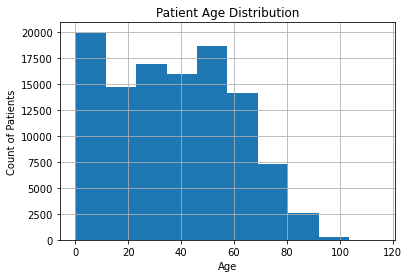

In [33]:
#histograhm for age 
df_clean.age.hist()
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count of Patients");

its right skewed meaning there is more younger people than elders

In [34]:
#count of values in each group
df_clean.age_group.value_counts()

13 - 29     23492
0 - 12      22139
30 - 44     21954
45 - 58     21768
59 - 115    21173
Name: age_group, dtype: int64

/Users/fahadbakoor/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


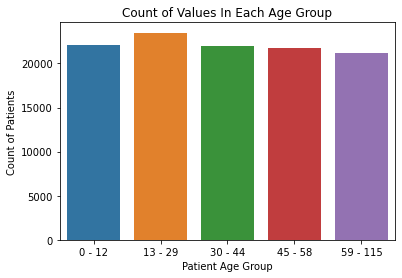

In [35]:
sns.countplot(df_clean.age_group,colur=)
plt.title("Count of Values In Each Age Group")
plt.xlabel("Patient Age Group")
plt.ylabel("Count of Patients");

The age groups have extremly similar count 

In [36]:
df_clean.groupby('age_group').mean()

,is_female,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
age_group,,,,,,,,,
0 - 12,0.478070,5.369348,0.102173,0.000723,0.000858,0.000678,0.006053,0.294774,0.791770
13 - 29,0.714584,22.095181,0.127618,0.014814,0.006343,0.011068,0.014941,0.330027,0.749702
30 - 44,0.700692,37.891819,0.155780,0.121208,0.035711,0.044730,0.019040,0.333333,0.786280
45 - 58,0.679805,52.581036,0.072997,0.329061,0.108875,0.061007,0.022786,0.333150,0.821068
59 - 115,0.674774,70.133188,0.027960,0.548482,0.218250,0.036603,0.039768,0.313276,0.846880


### Remarks:
- patients with age above 45 have the highest hypertension and diabetes mean
- patients from age 30 to 58 have the highest alcoholism mean
- patients from age 45 to 58 have the highest scholarship mean

In [37]:
#age group's hipertension affect on show
df_clean.groupby(['age_group','hipertension']).show.mean()

age_group  hipertension
0 - 12     0               0.791891
           1               0.625000
13 - 29    0               0.749265
           1               0.778736
30 - 44    0               0.783237
           1               0.808343
45 - 58    0               0.822732
           1               0.817674
59 - 115   0               0.856799
           1               0.838715
Name: show, dtype: float64

In [38]:
#age group's diabetes affect on show
df_clean.groupby(['age_group','diabetes']).show.mean()

age_group  diabetes
0 - 12     0           0.791817
           1           0.736842
13 - 29    0           0.750203
           1           0.671141
30 - 44    0           0.785782
           1           0.799745
45 - 58    0           0.822250
           1           0.811392
59 - 115   0           0.850773
           1           0.832937
Name: show, dtype: float64

In [39]:
#age group's alcoholism affect on show
df_clean.groupby(['age_group','alcoholism']).show.mean()

age_group  alcoholism
0 - 12     0             0.791991
           1             0.466667
13 - 29    0             0.750517
           1             0.676923
30 - 44    0             0.786000
           1             0.792261
45 - 58    0             0.822750
           1             0.795181
59 - 115   0             0.846407
           1             0.859355
Name: show, dtype: float64

Children who suffer from alcoholism have a low show mean(0.46)

In [40]:
#handcap affect on age and show
df_clean.groupby(['age_group','handcap']).show.mean()

age_group  handcap
0 - 12     0          0.792820
           1          0.619403
13 - 29    0          0.748887
           1          0.803419
30 - 44    0          0.785150
           1          0.844498
45 - 58    0          0.820891
           1          0.828629
59 - 115   0          0.847278
           1          0.837292
Name: show, dtype: float64

In [41]:
#scholarship affect on age and show
df_clean.groupby(['age_group','scholarship']).show.mean()

age_group  scholarship
0 - 12     0              0.793882
           1              0.773210
13 - 29    0              0.753733
           1              0.722148
30 - 44    0              0.790547
           1              0.763158
45 - 58    0              0.823232
           1              0.793581
59 - 115   0              0.847043
           1              0.841216
Name: show, dtype: float64

In [42]:
#sms_received affect on age and show
df_clean.groupby(['age_group','sms_received']).show.mean()

age_group  sms_received
0 - 12     0               0.826875
           1               0.707784
13 - 29    0               0.800178
           1               0.647233
30 - 44    0               0.829393
           1               0.700055
45 - 58    0               0.846859
           1               0.769443
59 - 115   0               0.864718
           1               0.807779
Name: show, dtype: float64

### Question 2 Answer:
### Older Patients (45-58, 59-115)  show up the most, and Teenagers and Young Adults (13 - 29) show up the least, other age groups have a normal show up rate 

### Remarks about other columns affect on age and showing up:
#### older patients (45-58, 59-115) with high show up rate regarding:
- diabetes (0.81, 0.83)
- sms_received (0.76, 0.8)
- scholarship (0.79, 0.84)
- handcap (0.82, 0.83)
- alcoholism (0.79, 0.85)

##### and low show up rate regardless of:
- None

#### Young adults and teenagers (13 - 29) have high show up rate regarding:
- handcap (0.80)

##### and low show up rate regardless of:
- sms_received (0.64)
- alcoholism (0.67)
- diabetes (0.67)

#### Children  (0 - 12) have high show up rate regarding:
- scholarship (0.77)
- diabetes    (0.73)

##### and low show up rate regardless of :
- handcap (0.61)
- alcoholism (0.46)
- hipertension (0.62)

<a id='conclusions'></a>
## Conclusions

There is no notable association between gender and showing up,  but we can find a relationship between age and show up, with teenagers and young adults (13-29) being the least likely age group to show up while older patients (45-58 & 59-115) are more likely to show up for an appointment.



#### Limitations
- Data about the distance between the patient and hospital would be beneficial
- almost all columns are binary variables 

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1